## 작성 정보

- **작성자**: 3002 기동주  
- **작성 목적**: [파이썬 3일차 실습 - Pandas + Seaborn 분석 리포트 생성]  
  - Pandas로 AI 임베딩 전처리를 위한 통계 요약 및 이상치 탐지  
  - Seaborn으로 변수 간 관계 시각화 및 AI 분석 Insight 도출  
  - 분석 내용을 Markdown 또는 PDF 리포트 형태로 정리  
- **작성일**: 2026.01.27  

---

## 변경사항 내역
*(날짜, 변경 목적, 변경 내용 순으로 기입)*

---

## 과제 시나리오

- 고객 리뷰 데이터는 **LLM 임베딩을 통해 제품 추천에 활용될 예정**입니다.
- 이전에 생성된 `reviews.csv` 파일을 불러와,  
  유사도 분석에 앞서 **데이터의 패턴과 분포를 이해하는 EDA 리포트**를 작성합니다.
- **Python + Pandas + Seaborn**을 활용해 분석하고,  
  분석 리포트를 작성하세요.


In [46]:
import pandas as pd

df = pd.read_csv('reviews_1000.csv')

print (df.head())

  review_id product_id category                         review_text  \
0     R0001       P158     home  Amazing quality and fast shipping.   
1     R0002       P117  fashion         Just okay, nothing special.   
2     R0003       P160  fashion                Not worth the money.   
3     R0004       P127  fashion         Just okay, nothing special.   
4     R0005       P151     home         Just okay, nothing special.   

   review_length  num_words  sentiment_score  rating  
0            134         27            -0.60       3  
1            115         28            -0.10       5  
2            139         32             0.20       5  
3            165         32             0.22       4  
4            112         15            -0.03       4  


In [ ]:
print(df.isnull().sum()) # 컬럼 별 결측치 개수 확인

review_id          0
product_id         0
category           0
review_text        5
review_length      0
num_words          0
sentiment_score    5
rating             0
dtype: int64


In [48]:
# 결측치 5건은 매우 작은 양이기 때문에 제거 후 결측치 다시 확인
df = df.dropna(subset=["review_text"])
df = df.dropna(subset=["sentiment_score"])

print(df.isnull().sum())

review_id          0
product_id         0
category           0
review_text        0
review_length      0
num_words          0
sentiment_score    0
rating             0
dtype: int64


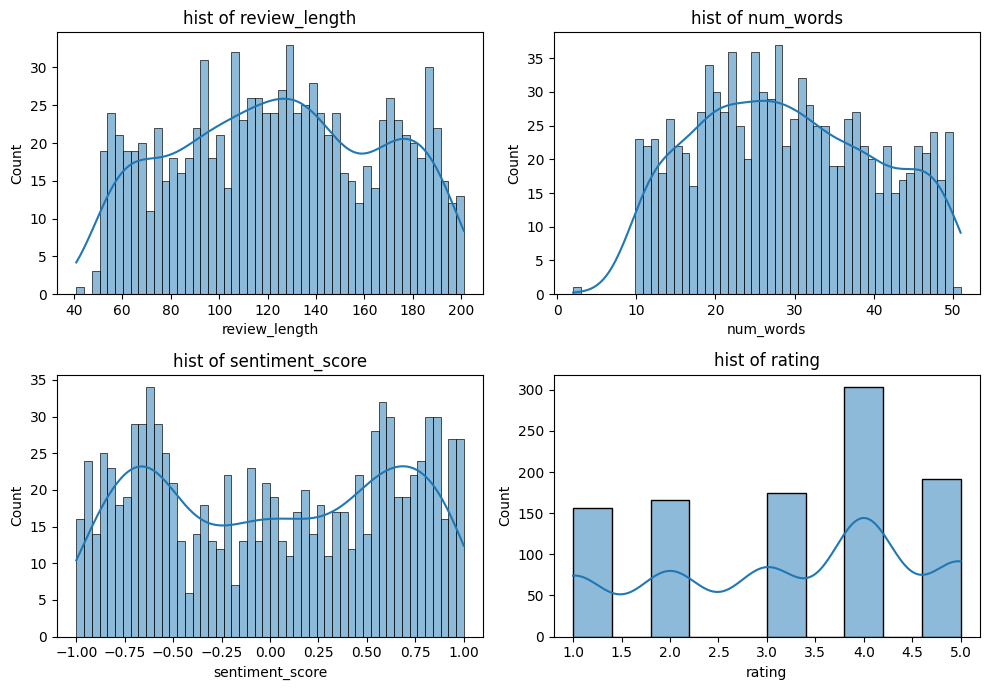

In [49]:
# 분포 시각화 및 이상치 탐지
# 전체 분포 형태 확인
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

axes = axes.ravel()  # axes를 배열처럼 접근 가능하도록 펼치기

sns.histplot(df["review_length"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("hist of review_length")

sns.histplot(df["num_words"], bins=50, ax=axes[1], kde=True)
axes[1].set_title("hist of num_words")

sns.histplot(df["sentiment_score"], bins=50, ax=axes[2], kde=True)
axes[2].set_title("hist of sentiment_score")

sns.histplot(df["rating"], bins=10, ax=axes[3], kde=True)
axes[3].set_title("hist of rating")

# 그래프 간의 간격을 자동으로 조정
plt.tight_layout()

# 그래프 출력
plt.show()

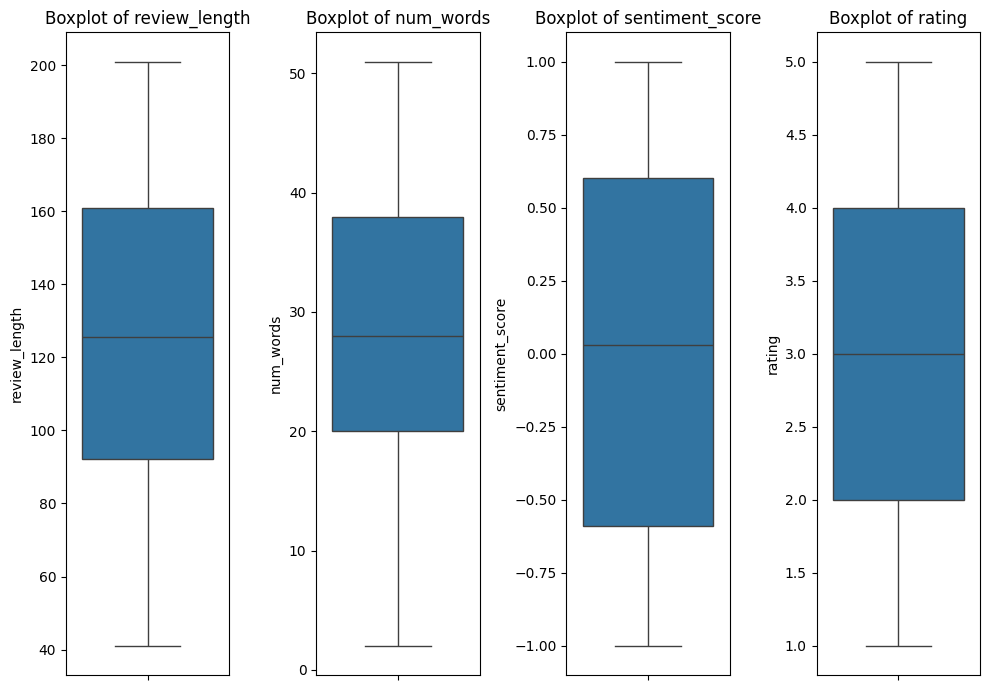

In [61]:
# 이상치 탐지 boxplot
cols = ["review_length", "num_words", "sentiment_score", "rating"]

fig, axes = plt.subplots(1, 4, figsize=(10, 7))
axes = axes.ravel()

for ax, col in zip(axes, cols):
    sns.boxplot(y=df[col], ax=ax)        
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# IQR 기준으로 명확한 이상치는 관측되지 않았음.

In [51]:
# 위에서 관측한 num_words가 매우 낮은 데이터 확인 결과 의미없는 리뷰는 아니었음
short_reviews = df[df["num_words"] < 3]
print(short_reviews)


   review_id product_id category                     review_text  \
62     R0063       P168   sports  Excellent product, I loved it!   

    review_length  num_words  sentiment_score  rating  
62             86          2            -0.15       4  


In [ ]:
# 기술 통계 및 시각화
print(df.describe())

       review_length   num_words  sentiment_score      rating
count     990.000000  990.000000       990.000000  990.000000
mean      124.810101   29.175758         0.023131    3.209091
std        41.723272   11.325206         0.616607    1.354212
min        41.000000    2.000000        -1.000000    1.000000
25%        92.250000   20.000000        -0.590000    2.000000
50%       125.500000   28.000000         0.030000    3.000000
75%       161.000000   38.000000         0.600000    4.000000
max       201.000000   51.000000         1.000000    5.000000


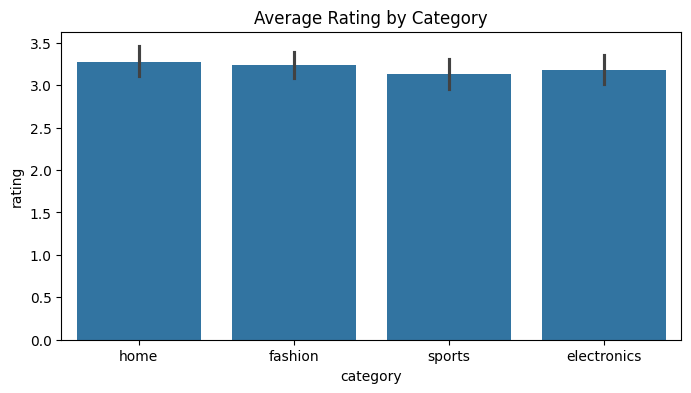

In [53]:
# category별 평균 평점 시각화 (barplot)

plt.figure(figsize=(8,4))
sns.barplot(x="category", y="rating", data=df, estimator="mean")
plt.title("Average Rating by Category")
plt.show()

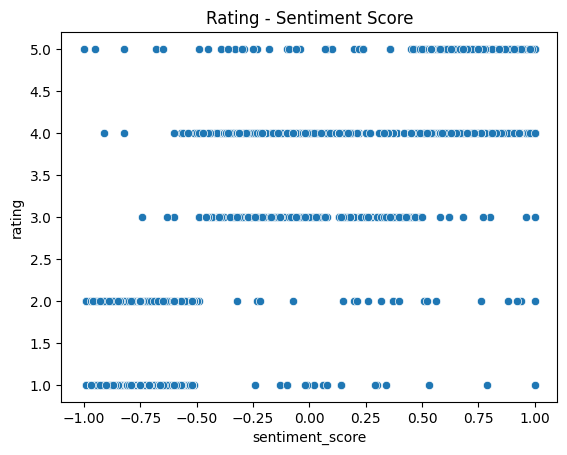

In [54]:
# 평점과 감성 점수 관계 시각화

sns.scatterplot(x="sentiment_score", y="rating", data=df)
plt.title("Rating - Sentiment Score")
plt.show()

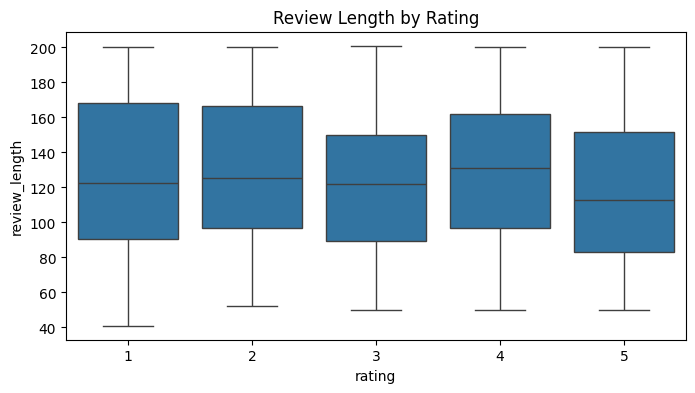

In [ ]:
#  텍스트 길이와 평점의 관계 (boxplot or violinplot)

plt.figure(figsize=(8,4))
sns.boxplot(x="rating", y="review_length", data=df)
plt.title("Review Length by Rating")
plt.show()

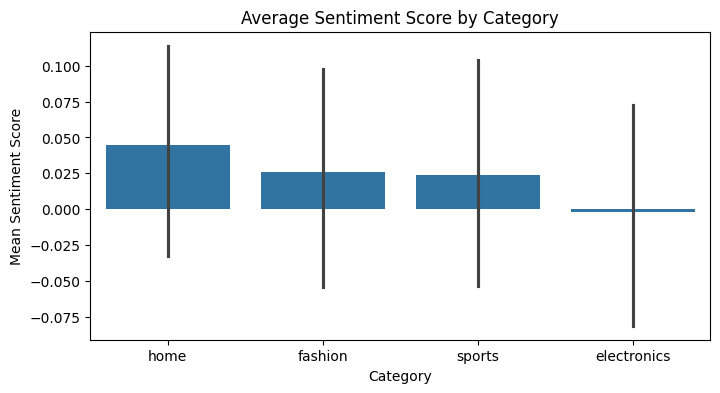

In [ ]:
# 카테고리별 감성 점수 상관관계
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df,
    x="category",
    y="sentiment_score",
    estimator="mean",
    errorbar="ci"  
)
plt.title("Average Sentiment Score by Category")
plt.ylabel("Mean Sentiment Score")
plt.xlabel("Category")
plt.show()